In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df = pd.read_csv('https://raw.githubusercontent.com/nishitpatel01/Fake_News_Detection/master/train.csv')
valid_df = pd.read_csv('https://raw.githubusercontent.com/nishitpatel01/Fake_News_Detection/master/valid.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/nishitpatel01/Fake_News_Detection/master/test.csv')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  10240 non-null  object
 1   Label      10240 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 90.1+ KB


In [6]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  2571 non-null   object
 1   Label      2569 non-null   object
dtypes: object(2)
memory usage: 40.3+ KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  2551 non-null   object
 1   Label      2551 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 22.5+ KB


# Data prepraring

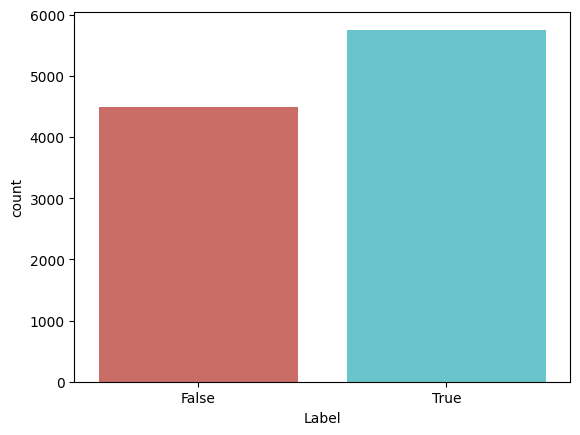

In [8]:
sns.countplot(x = 'Label', data = train_df, palette='hls');

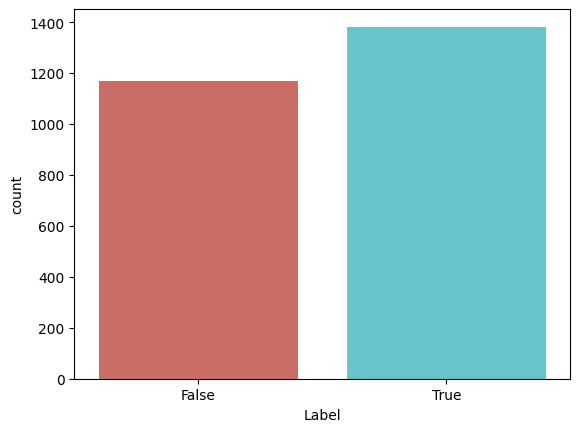

In [9]:
sns.countplot(x = 'Label', data = test_df, palette='hls');

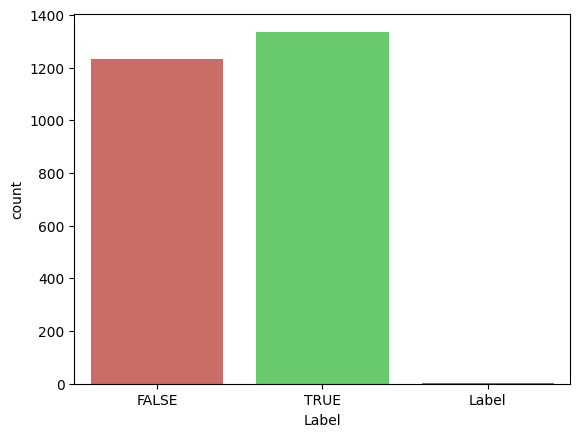

In [10]:
sns.countplot(x = 'Label', data = valid_df, palette='hls');

In [11]:
valid_df_non = valid_df[valid_df.isnull().any(axis=1)]
valid_df_non

,Statement,Label
1284,=======,NaN
2570,>>>>>>> f88339ab0722caf66aff4094544f81ce23820d3b,NaN


In [12]:
valid_df = valid_df.dropna()

In [13]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2569 entries, 0 to 2569
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Statement  2569 non-null   object
 1   Label      2569 non-null   object
dtypes: object(2)
memory usage: 60.2+ KB


In [14]:
train_df.head(5)

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [15]:
train_df['Statement'][8]

'However, it took $19.5 million in Oregon Lottery funds for the Port of Newport to eventually land the new NOAA Marine Operations Center-Pacific.'

In [16]:
def create_unigram(words):
    assert type(words) == list
    return words

In [17]:
create_unigram(["hello fsaf", 'aga'])

['hello fsaf', 'aga']

In [18]:
def create_biagram(words):
    assert type(words) == list
    skip = 0
    join_str = " "
    n = len(words)
    if n > 1:
        lst = []
        for i in  range(n - 1):
            for k in range(1, skip + 2):
                if i + k < n:
                    lst.append(join_str.join([words[i], words[i+k]]))
    else:
        lst = create_unigram(words)
    return lst

In [19]:
create_biagram(['fasf','asfa', 'h54we'])

['fasf asfa', 'asfa h54we']

<Axes: xlabel='Label', ylabel='count'>

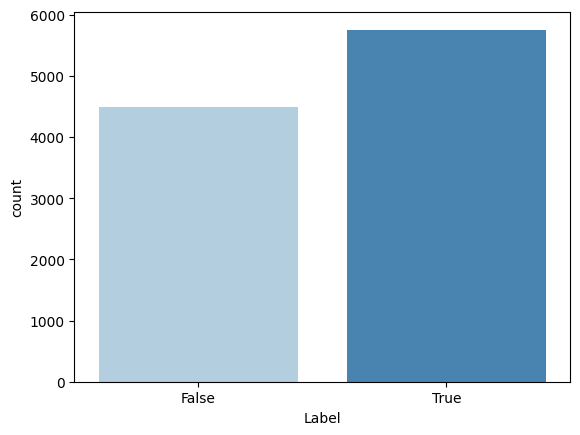

In [20]:
sns.countplot(x = 'Label', data=train_df, palette='Blues')

In [21]:
valid_df.describe()

,Statement,Label
count,2569,2569
unique,1285,3
top,We have less Americans working now than in the...,TRUE
freq,2,1336


<Axes: xlabel='Label', ylabel='count'>

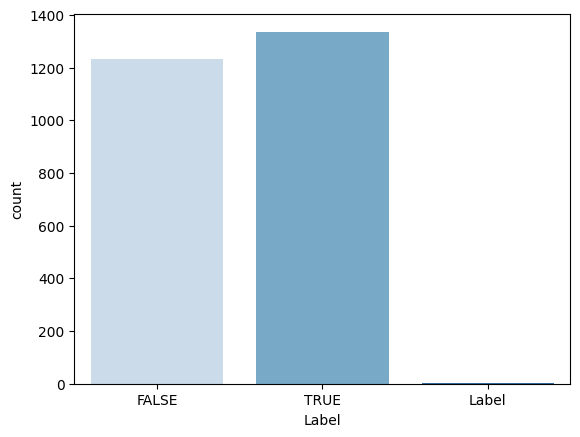

In [22]:
sns.countplot(x = 'Label', data=valid_df, palette="Blues")

In [23]:
valid_drop = valid_df[valid_df['Label'] == "Label"]
valid_drop

,Statement,Label
1285,Statement,Label


In [24]:
valid_df = valid_df.drop(index=1285)

In [25]:
valid_df.head(5)

,Statement,Label
0,We have less Americans working now than in the...,FALSE
1,"When Obama was sworn into office, he DID NOT u...",FALSE
2,Says Having organizations parading as being so...,FALSE
3,Says nearly half of Oregons children are poor.,TRUE
4,On attacks by Republicans that various program...,TRUE


<Axes: xlabel='Label', ylabel='count'>

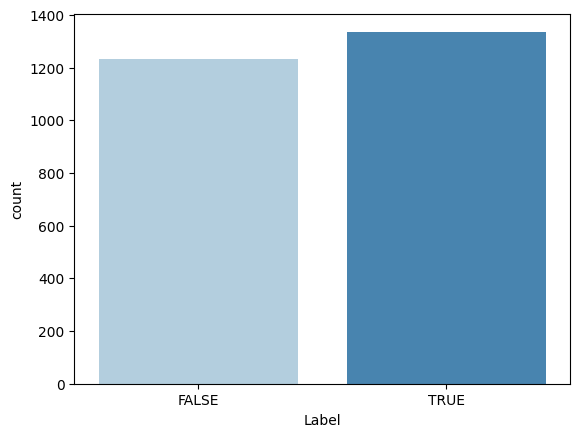

In [26]:
sns.countplot(x = 'Label', data=valid_df, palette="Blues")

<Axes: xlabel='Label', ylabel='count'>

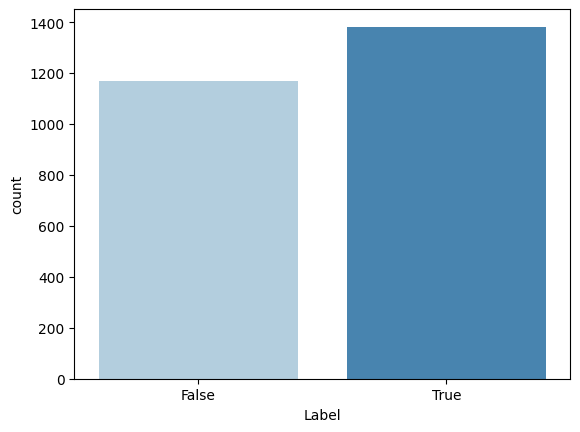

In [27]:
sns.countplot(x = 'Label', data=test_df, palette="Blues")

In [28]:
X_train, Y_train = train_df['Statement'], train_df['Label']
X_vaild, Y_valid = valid_df['Statement'], valid_df['Label']
X_test, Y_test = test_df['Statement'], test_df['Label']

In [29]:
Y_train.head()

0    False
1     True
2     True
3    False
4     True
Name: Label, dtype: bool

In [30]:
Y_valid

0       FALSE
1       FALSE
2       FALSE
3        TRUE
4        TRUE
        ...  
2565     TRUE
2566     TRUE
2567     TRUE
2568    FALSE
2569    FALSE
Name: Label, Length: 2568, dtype: object

In [31]:
X_vaild

0       We have less Americans working now than in the...
1       When Obama was sworn into office, he DID NOT u...
2       Says Having organizations parading as being so...
3          Says nearly half of Oregons children are poor.
4       On attacks by Republicans that various program...
                              ...                        
2565    For the first time in more than a decade, impo...
2566    Says Donald Trump has bankrupted his companies...
2567    John McCain and George Bush have "absolutely n...
2568    A new poll shows 62 percent support the presid...
2569    No one claims the report vindicating New Jerse...
Name: Statement, Length: 2568, dtype: object

In [32]:
Y_test

0        True
1       False
2       False
3        True
4       False
        ...  
2546     True
2547     True
2548     True
2549    False
2550    False
Name: Label, Length: 2551, dtype: bool

In [33]:
Y_train = Y_train.apply({True: 1, False: 0}.get)
Y_test = Y_test.apply({True: 1, False: 0}.get)
Y_valid = Y_valid.apply({'TRUE': 1, 'FALSE': 0}.get)

In [34]:
Y_train.head()

0    0
1    1
2    1
3    0
4    1
Name: Label, dtype: int64

In [35]:
Y_valid.head()

0    0
1    0
2    0
3    1
4    1
Name: Label, dtype: int64

In [36]:
Y_test.head()

0    1
1    0
2    0
3    1
4    0
Name: Label, dtype: int64

In [37]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [38]:
lemmatizer = WordNetLemmatizer()
stpwords = list(stopwords.words('english'))
stpwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
import re
import nltk


In [40]:
def preparing_data(df):
    data_result = {"Statement": []}
    list_data_result = []
    for i in range(len(df)):
        corpus = []
        review = df[i]
        review = re.sub(r'[^a-zA-Z\s]', '', review)
        review = review.lower()
        review = nltk.word_tokenize(review)
        for y in review:
            if y not in stpwords:
                corpus.append(lemmatizer.lemmatize(y))
        review = ' '.join(corpus)
        list_data_result.append(review)
    data_result['Statement'] = list_data_result
    result = pd.DataFrame(data_result)
    return result

In [41]:
X_train = preparing_data(X_train)
X_train

,Statement
0,say annies list political group support thirdt...
1,decline coal start started natural gas took st...
2,hillary clinton agrees john mccain voting give...
3,health care reform legislation likely mandate ...
4,economic turnaround started end term
...,...
10235,larger number shark attack florida case voter ...
10236,democrat become party atlanta metro area black
10237,say alternative social security operates galve...
10238,lifting u cuban embargo allowing travel cuba


In [42]:
type(X_train)

pandas.core.frame.DataFrame

In [43]:
X_test = preparing_data(X_test)
X_test

,Statement
0,building wall usmexico border take literally year
1,wisconsin pace double number layoff year
2,say john mccain done nothing help vet
3,suzanne bonamici support plan cut choice medic...
4,asked reporter whether he center criminal sche...
...,...
2546,first time decade import accounted le half oil...
2547,say donald trump bankrupted company twice four...
2548,john mccain george bush absolutely plan univer...
2549,new poll show percent support president plan r...


In [44]:
X_vaild[0]

'We have less Americans working now than in the 70s.'

In [45]:
# dict = {"Statement": []}
list_stm = []
for i in range(0, len(X_vaild)):
    if ((i == 1284) | (i == 1285)):
        continue
    corpus = []
    review = X_vaild[i]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwords :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    list_stm.append(review)
# dict['Statement'] = list_stm

In [46]:
list_label = []
for i in range(0, len(Y_valid)):
    if ((i == 1284) | (i == 1285)):
        continue
    list_label.append(Y_valid[i])
Y_valid = pd.Series(list_label)
    

In [47]:
Y_valid

0       0
1       0
2       0
3       1
4       1
       ..
2561    1
2562    0
2563    1
2564    1
2565    1
Length: 2566, dtype: int64

In [48]:
len(list_stm)

2566

In [49]:
d = pd.Series(list_stm)
X_vaild = d
X_vaild

0                                     le american working
1       obama sworn office use holy bible instead kura...
2       say organization parading social welfare organ...
3                       say nearly half oregon child poor
4       attack republican various program economic sti...
                              ...                        
2561    american believe moon landing fake believe oba...
2562    past two year democrat spent money country spe...
2563    first time decade import accounted le half oil...
2564    say donald trump bankrupted company twice four...
2565    john mccain george bush absolutely plan univer...
Length: 2566, dtype: object

In [50]:
len(X_vaild)

2566

In [51]:
Y_valid.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2566 entries, 0 to 2565
Series name: None
Non-Null Count  Dtype
--------------  -----
2566 non-null   int64
dtypes: int64(1)
memory usage: 20.2 KB


## Using Vectorizer

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
tfidf_v1 = TfidfVectorizer()
tfidf_X_train = tfidf_v1.fit_transform(X_train['Statement'])

tfidf_v2 = TfidfVectorizer(vocabulary=tfidf_v1.vocabulary_)
tfidf_X_valid = tfidf_v2.fit_transform(X_vaild)
tfidf_X_test = tfidf_v2.fit_transform(X_test['Statement'])

In [54]:
tfidf_X_train

<10240x10792 sparse matrix of type '<class 'numpy.float64'>'
	with 102680 stored elements in Compressed Sparse Row format>

In [55]:
tfidf_X_valid

<2566x10792 sparse matrix of type '<class 'numpy.float64'>'
	with 24369 stored elements in Compressed Sparse Row format>

In [56]:
tfidf_X_test

<2551x10792 sparse matrix of type '<class 'numpy.float64'>'
	with 24445 stored elements in Compressed Sparse Row format>

# Fit and Predict

## Prepare the plot to show confusion matrix

In [100]:
import itertools

In [107]:
def plot_confusion_matrix(cm, classes, normalize = False):
    plt.imshow(cm, interpolation='nearest', cmap = plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalized')
    
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], horizontalalignment = "center", color = 'black')
    
    plt.tight_layout()

## Training PassiveAggressiveClassifier

In [57]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [58]:
classifer_model = PassiveAggressiveClassifier()
classifer_model.fit(tfidf_X_train, Y_train)

PassiveAggressiveClassifier()

In [59]:
Y_predict_valid = classifer_model.predict(tfidf_X_valid)

In [99]:
score = metrics.accuracy_score(Y_valid, Y_predict_valid)
print(f'Accuracy: {round(score*100,2)} %')

Accuracy: 54.99 %


[[629 601]
 [554 782]]
Normalized confusion matrix


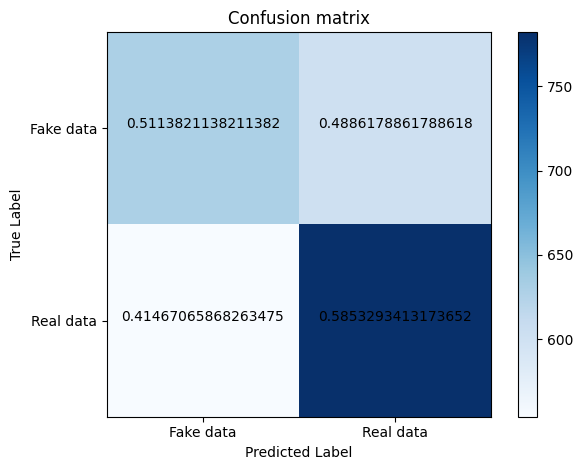

In [108]:
cm_pac = metrics.confusion_matrix(Y_valid, Y_predict_valid)
print(cm_pac)
plot_confusion_matrix(cm_pac, classes=["Fake data", "Real data"], normalize= True)

Confusion matrix, without normalized


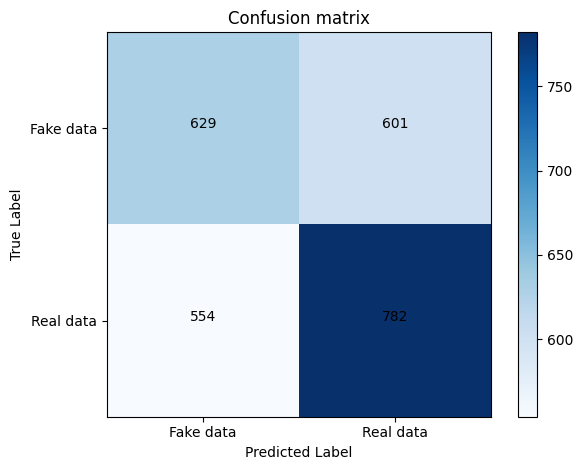

In [109]:
plot_confusion_matrix(cm_pac, classes=["Fake data", "Real data"], normalize= False)

In [110]:
import pickle

In [113]:
pickle.dump(classifer_model, open("./models/classifer_model.pkl", 'wb'))

## Training Logistic

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
log_model = LogisticRegression()
log_model.fit(tfidf_X_train, Y_train)

LogisticRegression()

In [63]:
Y_predic_valid_log = log_model.predict(tfidf_X_valid)

https://github.com/nishitpatel01/Fake_News_Detection/blob/master/final-fnd.ipynb

In [64]:
score_log = metrics.accuracy_score(Y_valid, Y_predic_valid_log)
score_log

0.607950116913484

Confusion matrix, without normalized


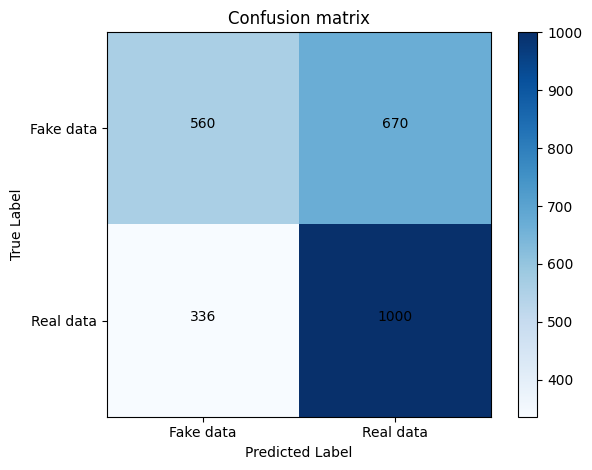

In [114]:
cm_logistic = metrics.confusion_matrix(Y_valid, Y_predic_valid_log)
plot_confusion_matrix(cm_logistic, classes=["Fake data", "Real data"])

In [115]:
pickle.dump(log_model, open("./models/logisticRegres.pkl", 'wb'))

## Training SVM

In [65]:
from sklearn.svm import LinearSVC, SVC

In [66]:
svm_model = LinearSVC()
svm_model.fit(tfidf_X_train, Y_train)

LinearSVC()

In [67]:
Y_predic_svm = svm_model.predict(tfidf_X_valid)
score_svm = metrics.accuracy_score(Y_valid, Y_predic_svm)
score_svm

0.5806703039750585

In [68]:
svc_model = SVC()
svc_model.fit(tfidf_X_train, Y_train)

SVC()

In [69]:
Y_predic_svc = svc_model.predict(tfidf_X_valid)
score_svc = metrics.accuracy_score(Y_valid, Y_predic_svc)
score_svc

0.6118472330475448

Confusion matrix, without normalized


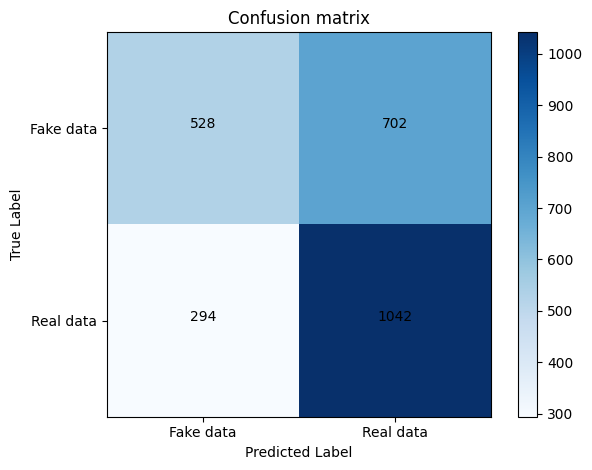

In [117]:
cm_svc = metrics.confusion_matrix(Y_valid, Y_predic_svc)
plot_confusion_matrix(cm_svc, classes=["Fake data", "Real data"])

In [118]:
pickle.dump(svc_model, open('./models/SVC_model.pkl', 'wb'))

## Training Decision Trees

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(tfidf_X_train, Y_train)

DecisionTreeClassifier()

In [72]:
Y_predic_dtc = dtc_model.predict(tfidf_X_valid)
score_dtc = metrics.accuracy_score(Y_valid, Y_predic_dtc)
score_dtc

0.563912704598597

Confusion matrix, without normalized


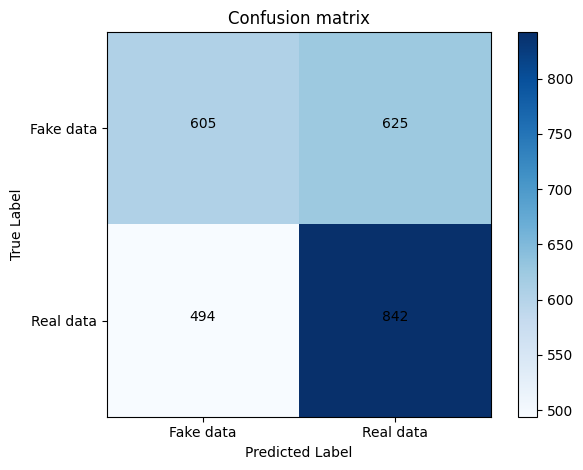

In [119]:
cm_dtc = metrics.confusion_matrix(Y_valid, Y_predic_dtc)
plot_confusion_matrix(cm_dtc, classes=["Fake data", "Real data"])

In [124]:
pickle.dump(dtc_model, open("./models/decision_tree_model.pkl", 'wb'))

## Training model Kneighbors

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
kn_model = KNeighborsClassifier()
kn_model.fit(tfidf_X_train, Y_train)

KNeighborsClassifier()

In [75]:
Y_predic_kn = kn_model.predict(tfidf_X_valid)
score_kn = metrics.accuracy_score(Y_valid, Y_predic_kn)
score_kn

0.5681995323460639

Confusion matrix, without normalized


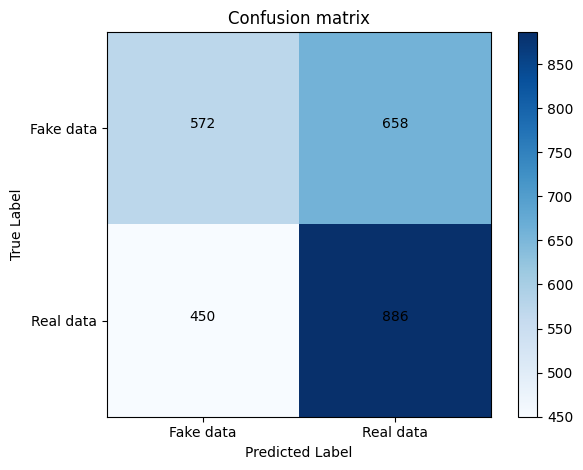

In [122]:
cm_knc = metrics.confusion_matrix(Y_valid, Y_predic_kn)
plot_confusion_matrix(cm_knc, classes=["Fake data", "Real data"])

In [123]:
pickle.dump(kn_model, open("./models/kneighbor.pkl", 'wb'))

## Validation predict test

In [126]:
load_model_classifer = pickle.load(open("./models/classifer_model.pkl", "rb"))
load_model_dtm = pickle.load(open("./models/decision_tree_model.pkl", "rb"))
load_model_kn = pickle.load(open("./models/kneighbor.pkl", "rb"))
load_model_log = pickle.load(open("./models/logisticRegres.pkl", "rb"))
load_model_SVC = pickle.load(open("./models/SVC_model.pkl", "rb"))


Accuracy: 55.04 %
Confusion matrix, without normalized


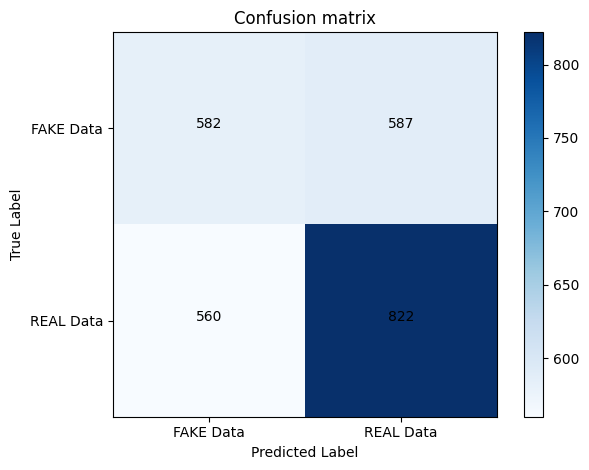

In [130]:
Y_predic_test_class = load_model_classifer.predict(tfidf_X_test)
accuracy_class_test = metrics.accuracy_score(Y_predic_test_class, Y_test)
print(f"Accuracy: {round(accuracy_class_test*100, 2)} %")
cm_class_test = metrics.confusion_matrix(Y_test, Y_predic_test_class)
plot_confusion_matrix(cm_class_test, classes=["FAKE Data", "REAL Data"])

Accuracy: 56.1 %
Confusion matrix, without normalized


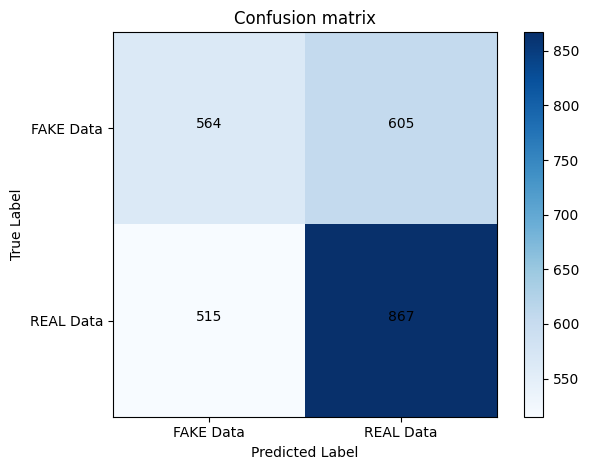

In [131]:
Y_predic_test_dct = load_model_dtm.predict(tfidf_X_test)
accuracy_dct_test = metrics.accuracy_score(Y_predic_test_dct, Y_test)
print(f"Accuracy: {round(accuracy_dct_test*100, 2)} %")
cm_dct_test = metrics.confusion_matrix(Y_test, Y_predic_test_dct)
plot_confusion_matrix(cm_dct_test, classes=["FAKE Data", "REAL Data"])

Accuracy: 56.45 %
Confusion matrix, without normalized


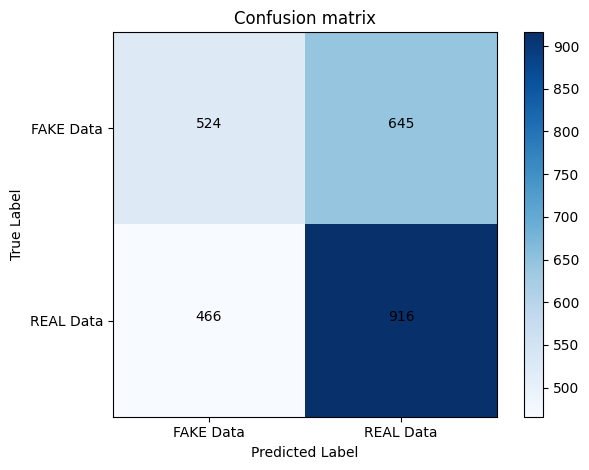

In [132]:
Y_predic_test_kn = load_model_kn.predict(tfidf_X_test)
accuracy_kn_test = metrics.accuracy_score(Y_predic_test_kn, Y_test)
print(f"Accuracy: {round(accuracy_kn_test*100, 2)} %")
cm_kn_test = metrics.confusion_matrix(Y_test, Y_predic_test_kn)
plot_confusion_matrix(cm_kn_test, classes=["FAKE Data", "REAL Data"])

Accuracy: 61.54 %
Confusion matrix, without normalized


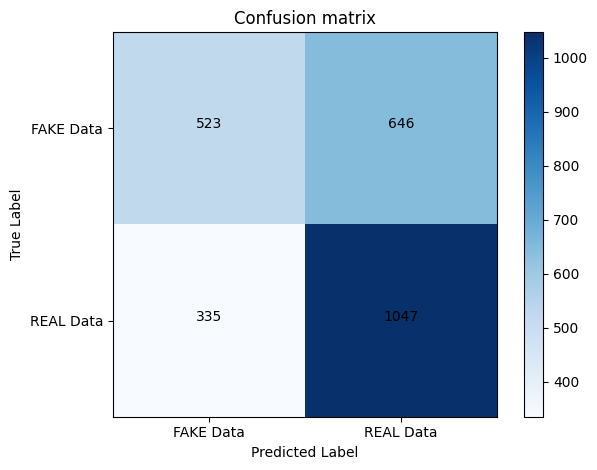

In [133]:
Y_predic_test_log = load_model_log.predict(tfidf_X_test)
accuracy_log_test = metrics.accuracy_score(Y_predic_test_log, Y_test)
print(f"Accuracy: {round(accuracy_log_test*100, 2)} %")
cm_log_test = metrics.confusion_matrix(Y_test, Y_predic_test_log)
plot_confusion_matrix(cm_log_test, classes=["FAKE Data", "REAL Data"])

Accuracy: 61.51 %
Confusion matrix, without normalized


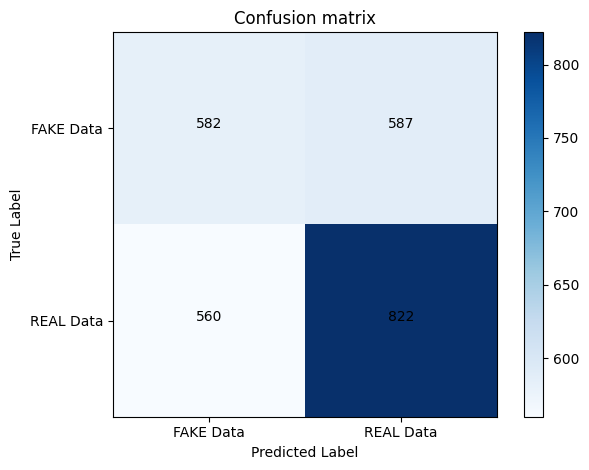

In [134]:
Y_predic_test_SVC = load_model_SVC.predict(tfidf_X_test)
accuracy_SVC_test = metrics.accuracy_score(Y_predic_test_SVC, Y_test)
print(f"Accuracy: {round(accuracy_SVC_test*100, 2)} %")
cm_SVC_test = metrics.confusion_matrix(Y_test, Y_predic_test_class)
plot_confusion_matrix(cm_SVC_test, classes=["FAKE Data", "REAL Data"])

# Summary

In [136]:
from prettytable import PrettyTable

In [143]:
myTable = PrettyTable(["Model", "Accuracy valid data", "Accuracy test data"])
myTable.add_row(["Passive Aggressive Classifer", f"{round(score*100, 2)}", f"{round(accuracy_class_test*100, 2)}"])
myTable.add_row(["Decision Tree", f"{round(score_dtc*100, 2)}", f"{round(accuracy_dct_test*100, 2)}"])
myTable.add_row(["Kneighbor", f"{round(score_kn*100, 2)}", f"{round(accuracy_kn_test*100, 2)}"])
myTable.add_row(["Logistic Regression", f"{round(score_log*100, 2)}", f"{round(accuracy_log_test*100, 2)}"])
myTable.add_row(["SVC", f"{round(score_svc*100, 2)}", f"{round(accuracy_SVC_test*100, 2)}"])

In [144]:
myTable

Model,Accuracy valid data,Accuracy test data
Passive Aggressive Classifer,54.99,55.04
Decision Tree,56.39,56.1
Kneighbor,56.82,56.45
Logistic Regression,60.8,61.54
SVC,61.18,61.51
